SQL Analysis

How many clients does the bank have and are above the age of 50?

What’s the distribution (in %) between male and female clients?

Let’s define a new variable called age_group:

10 < x ≤ 30
30 < x ≤ 40
40 < x ≤ 50
50 < x ≤ 60
60 <x ≤ 120
Per each age_group, marital_status and income_category, find out the following values:

a. Churn_rate (in %)

b. Average Total_Relationship_Count

c. Minimum value of Total_Amt_Chng_Q4_Q1

d. Count of customers

Make sure to order the data by the number of customers in descending order***

Out of the male clients, who are “blue” card holders, how many (in %) fall under the income category 40K - 60K?

Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) of Total_Amt_Chng_Q4_Q1?

We’re interested in knowing which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.

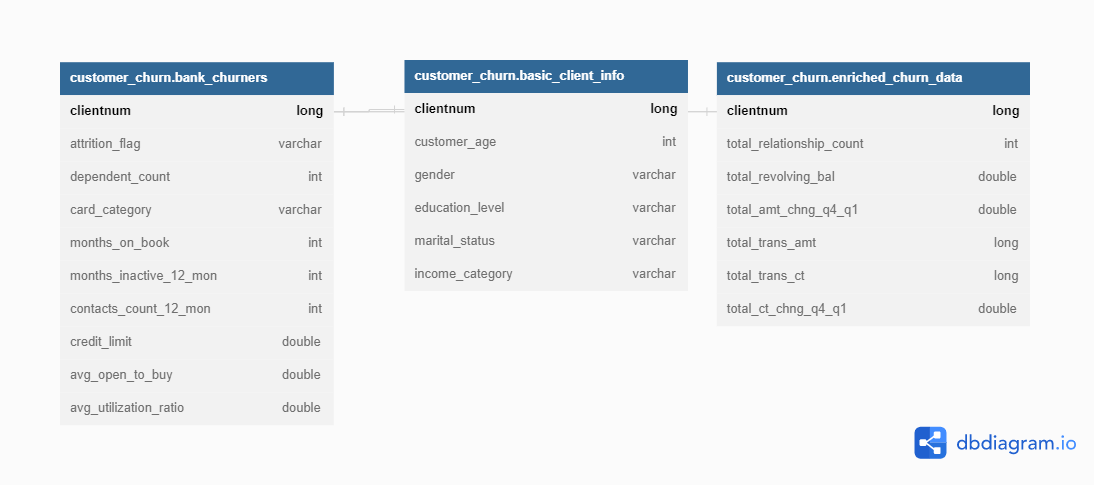



Question 1:

How many clients does the bank have and are above the age of 50?

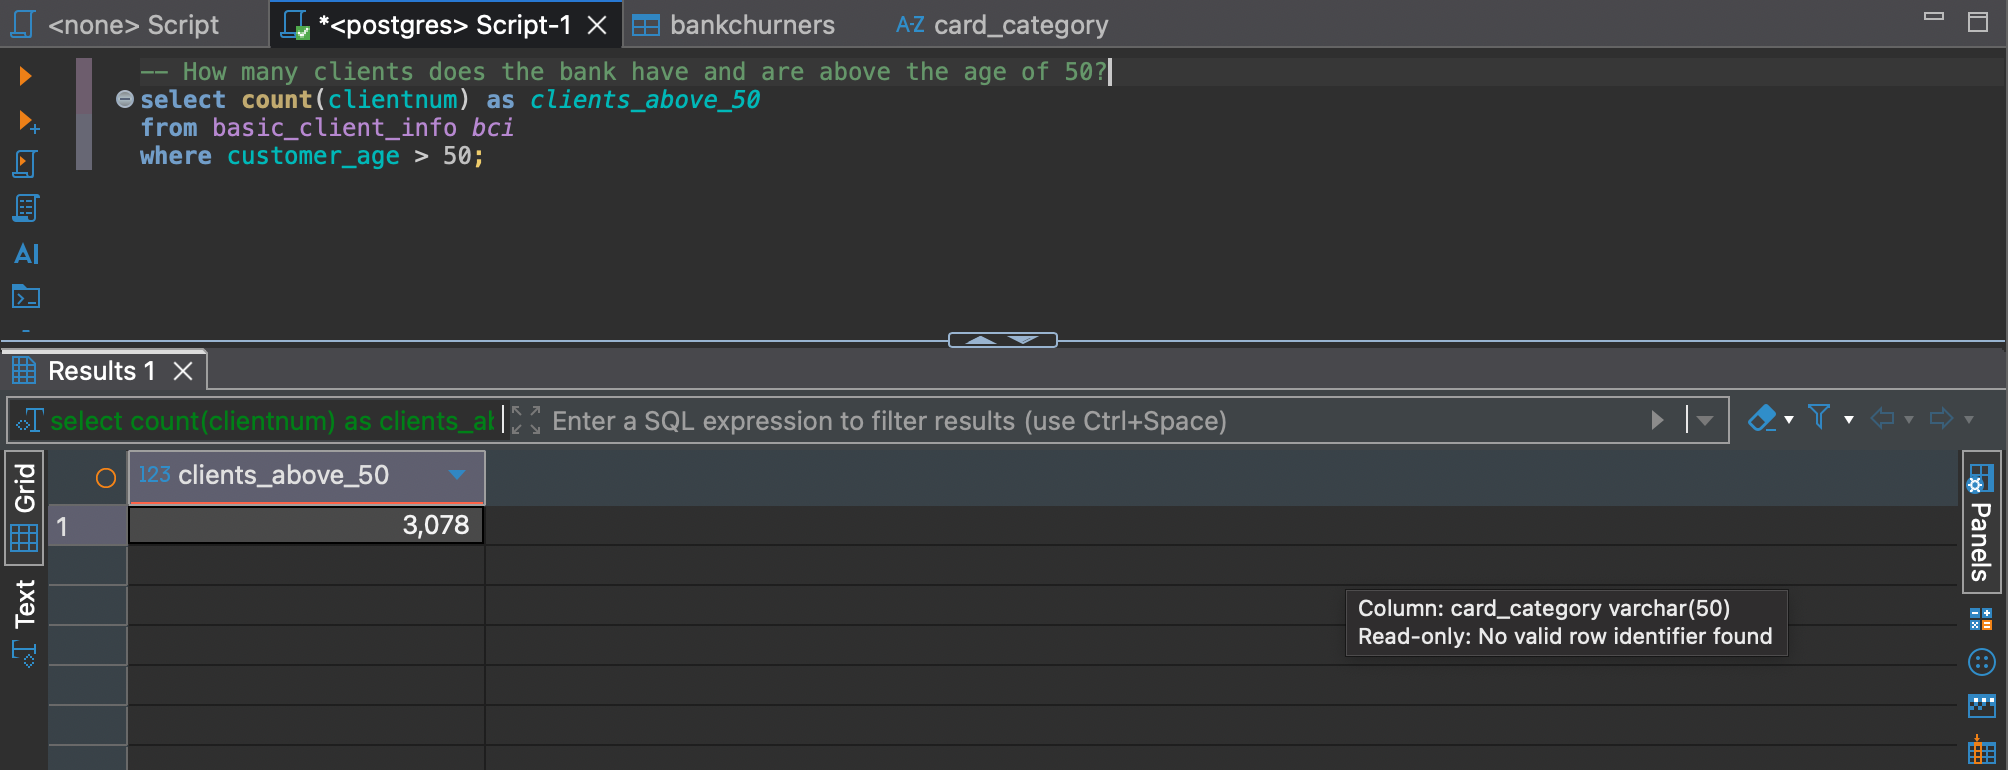

Question 2:

What’s the distribution (in %) between male and female clients?

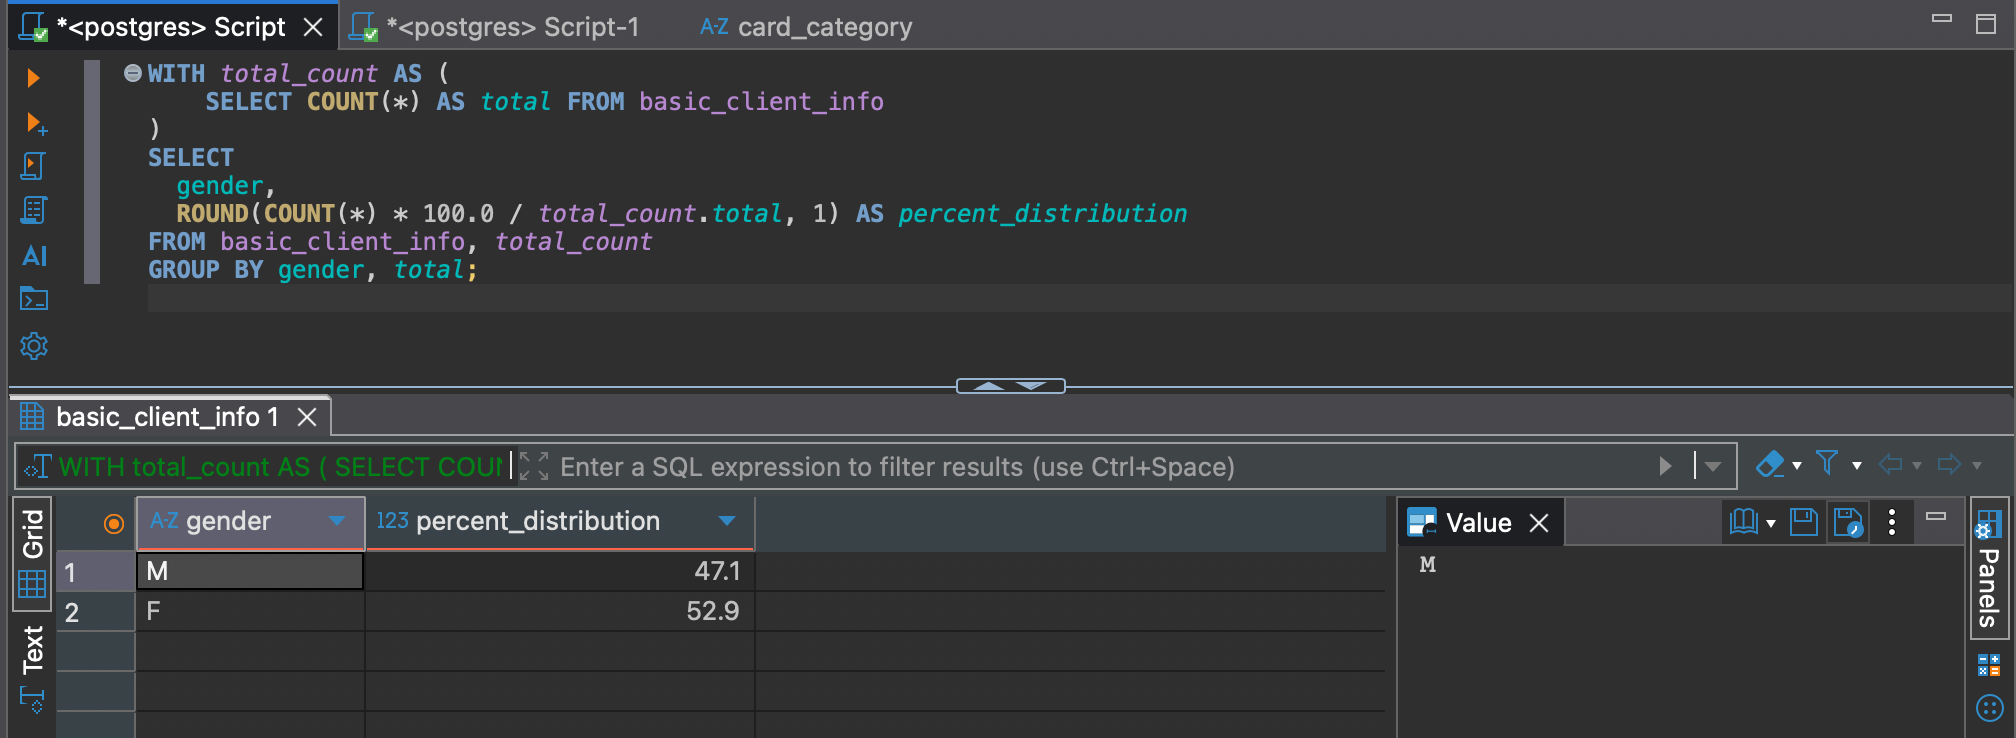

Question 3:

Per each age_group, marital_status and income_category, find out the following values:

a. Churn_rate (in %)
b. Average Total_Relationship_Count
c. Minimum value of Total_Amt_Chng_Q4_Q1
d. Count of customers

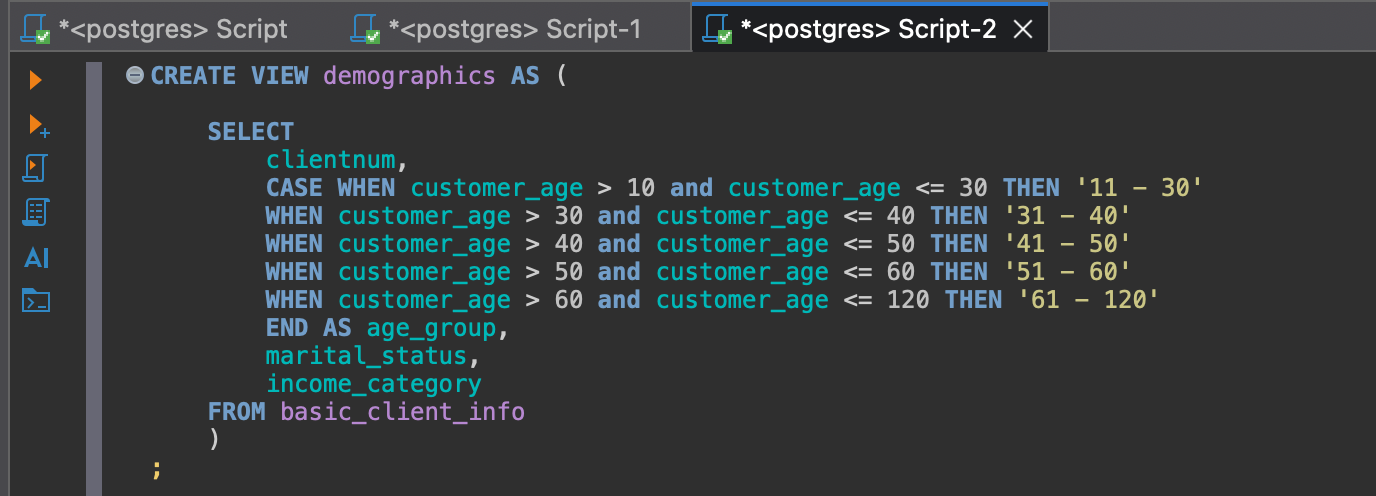
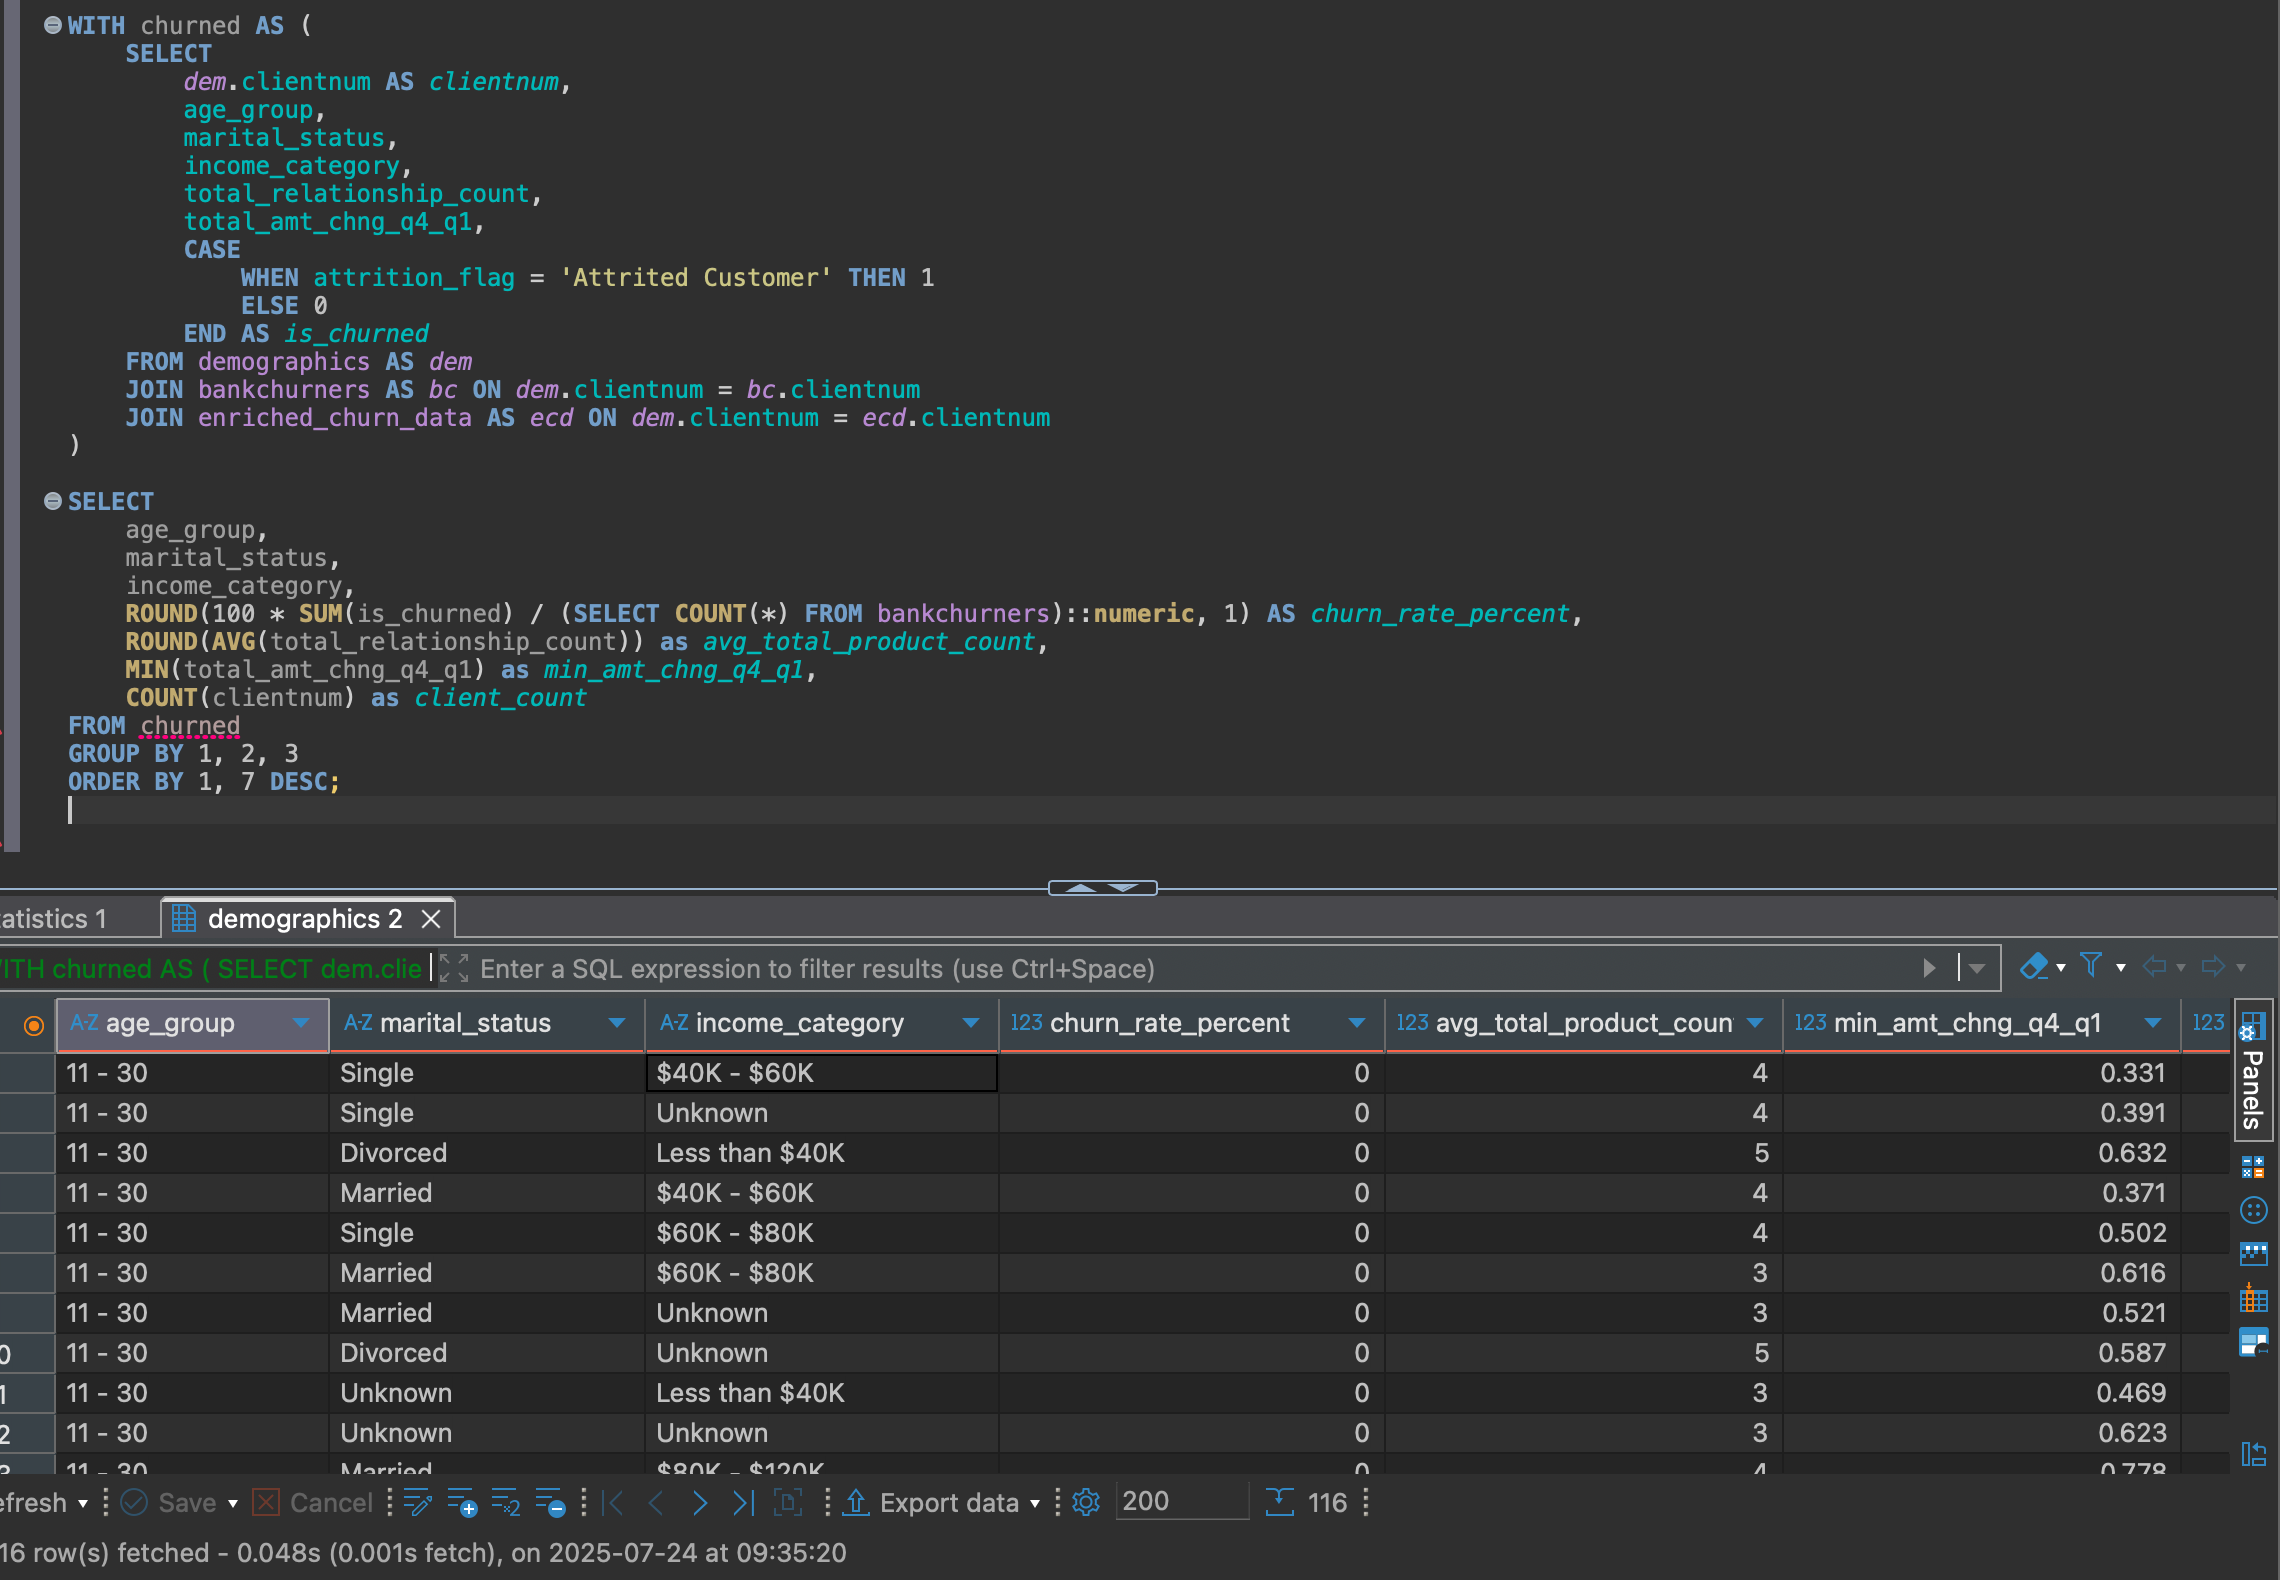

Question 4:

Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

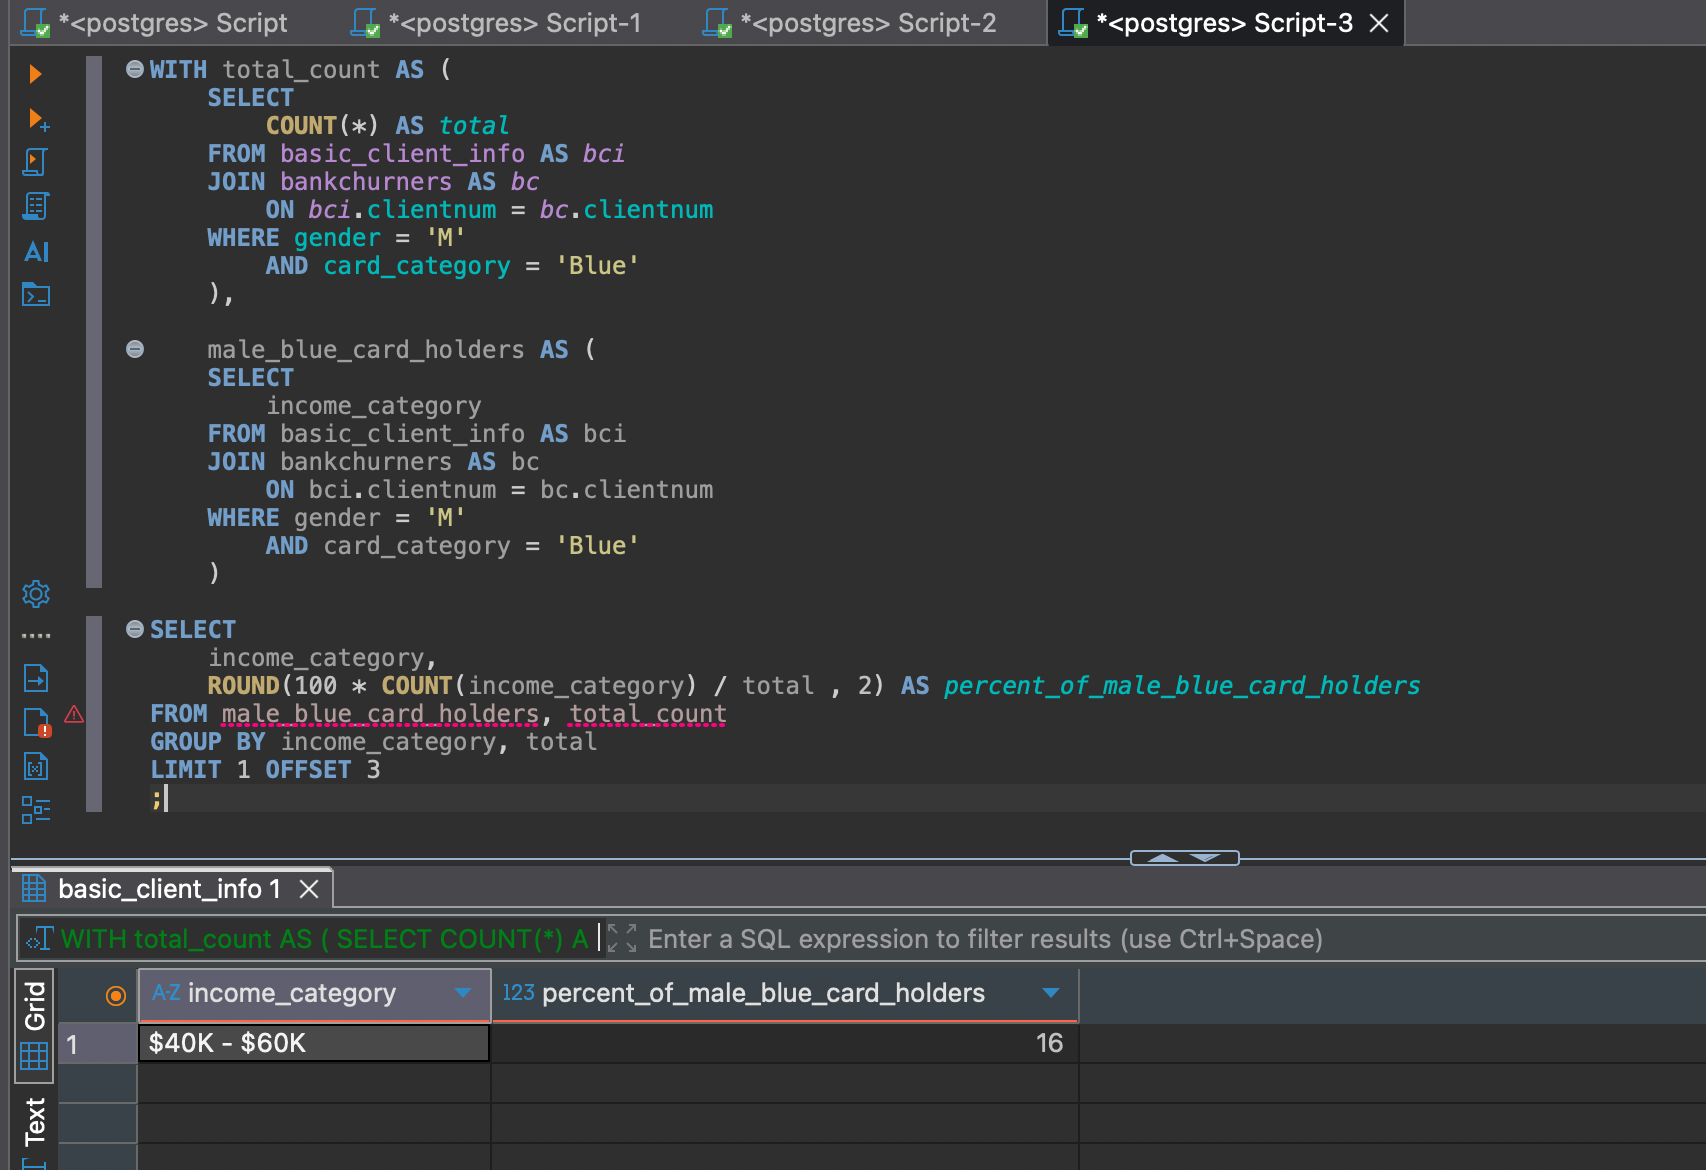


Question 5:

Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) of Total_Amt_Chng_Q4_Q1?

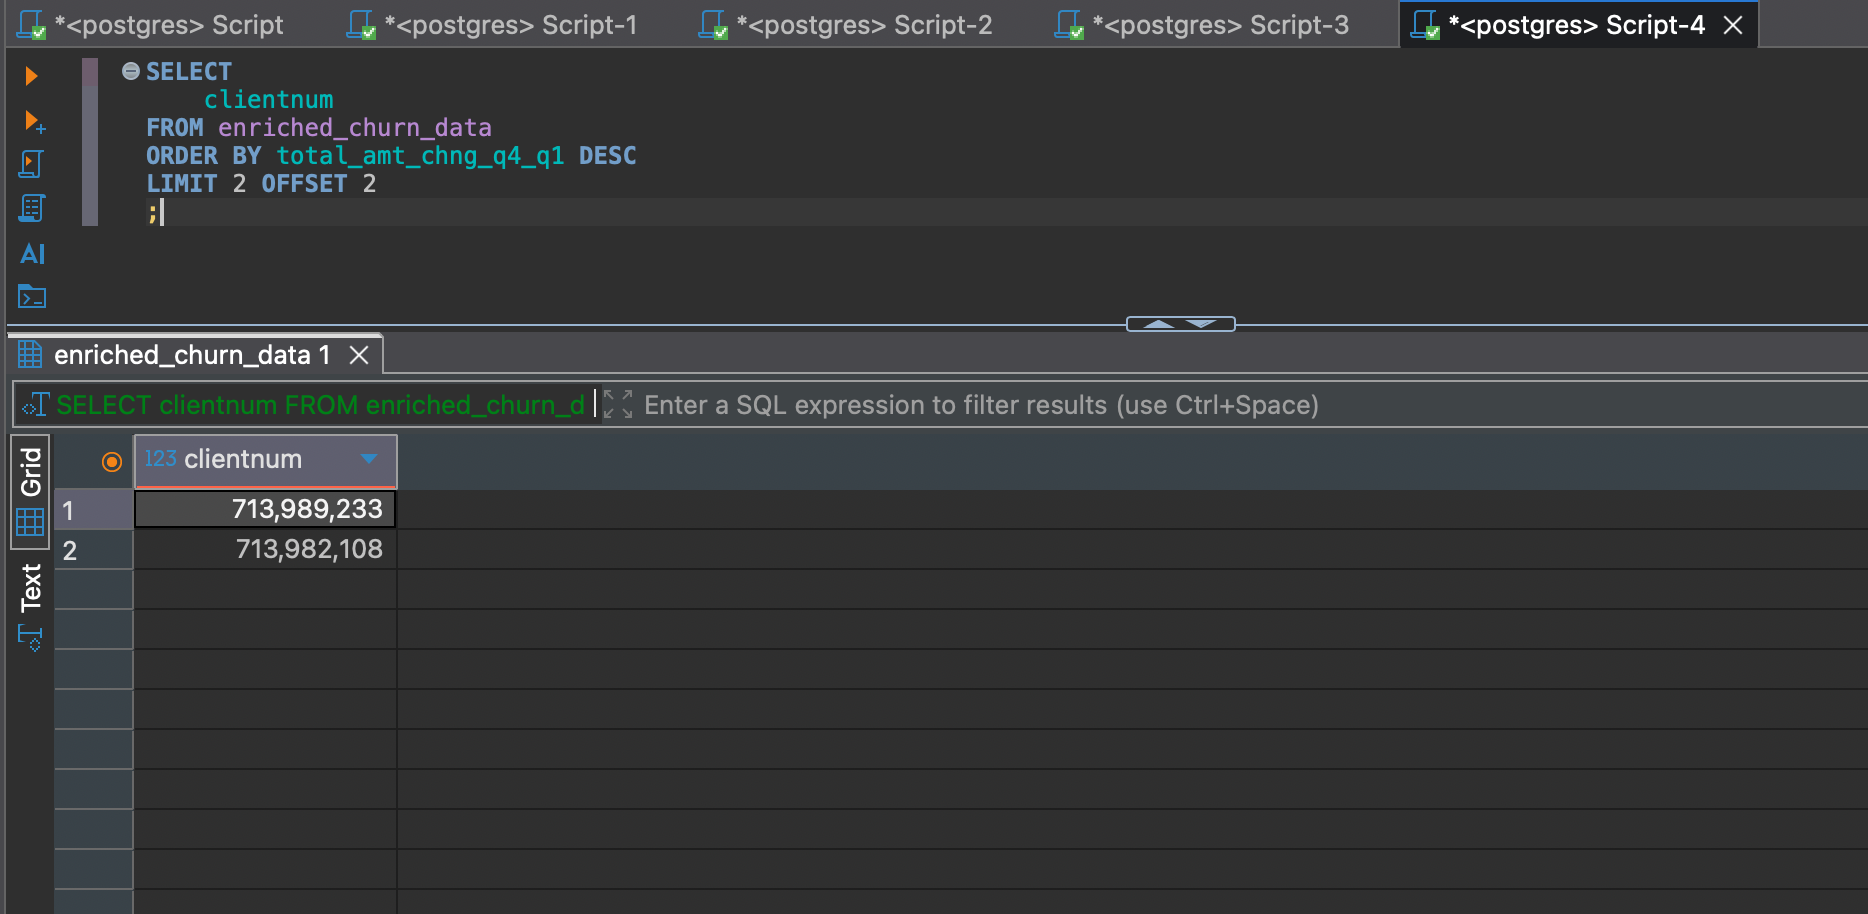


Question 6:

We’re interested in knowing which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.

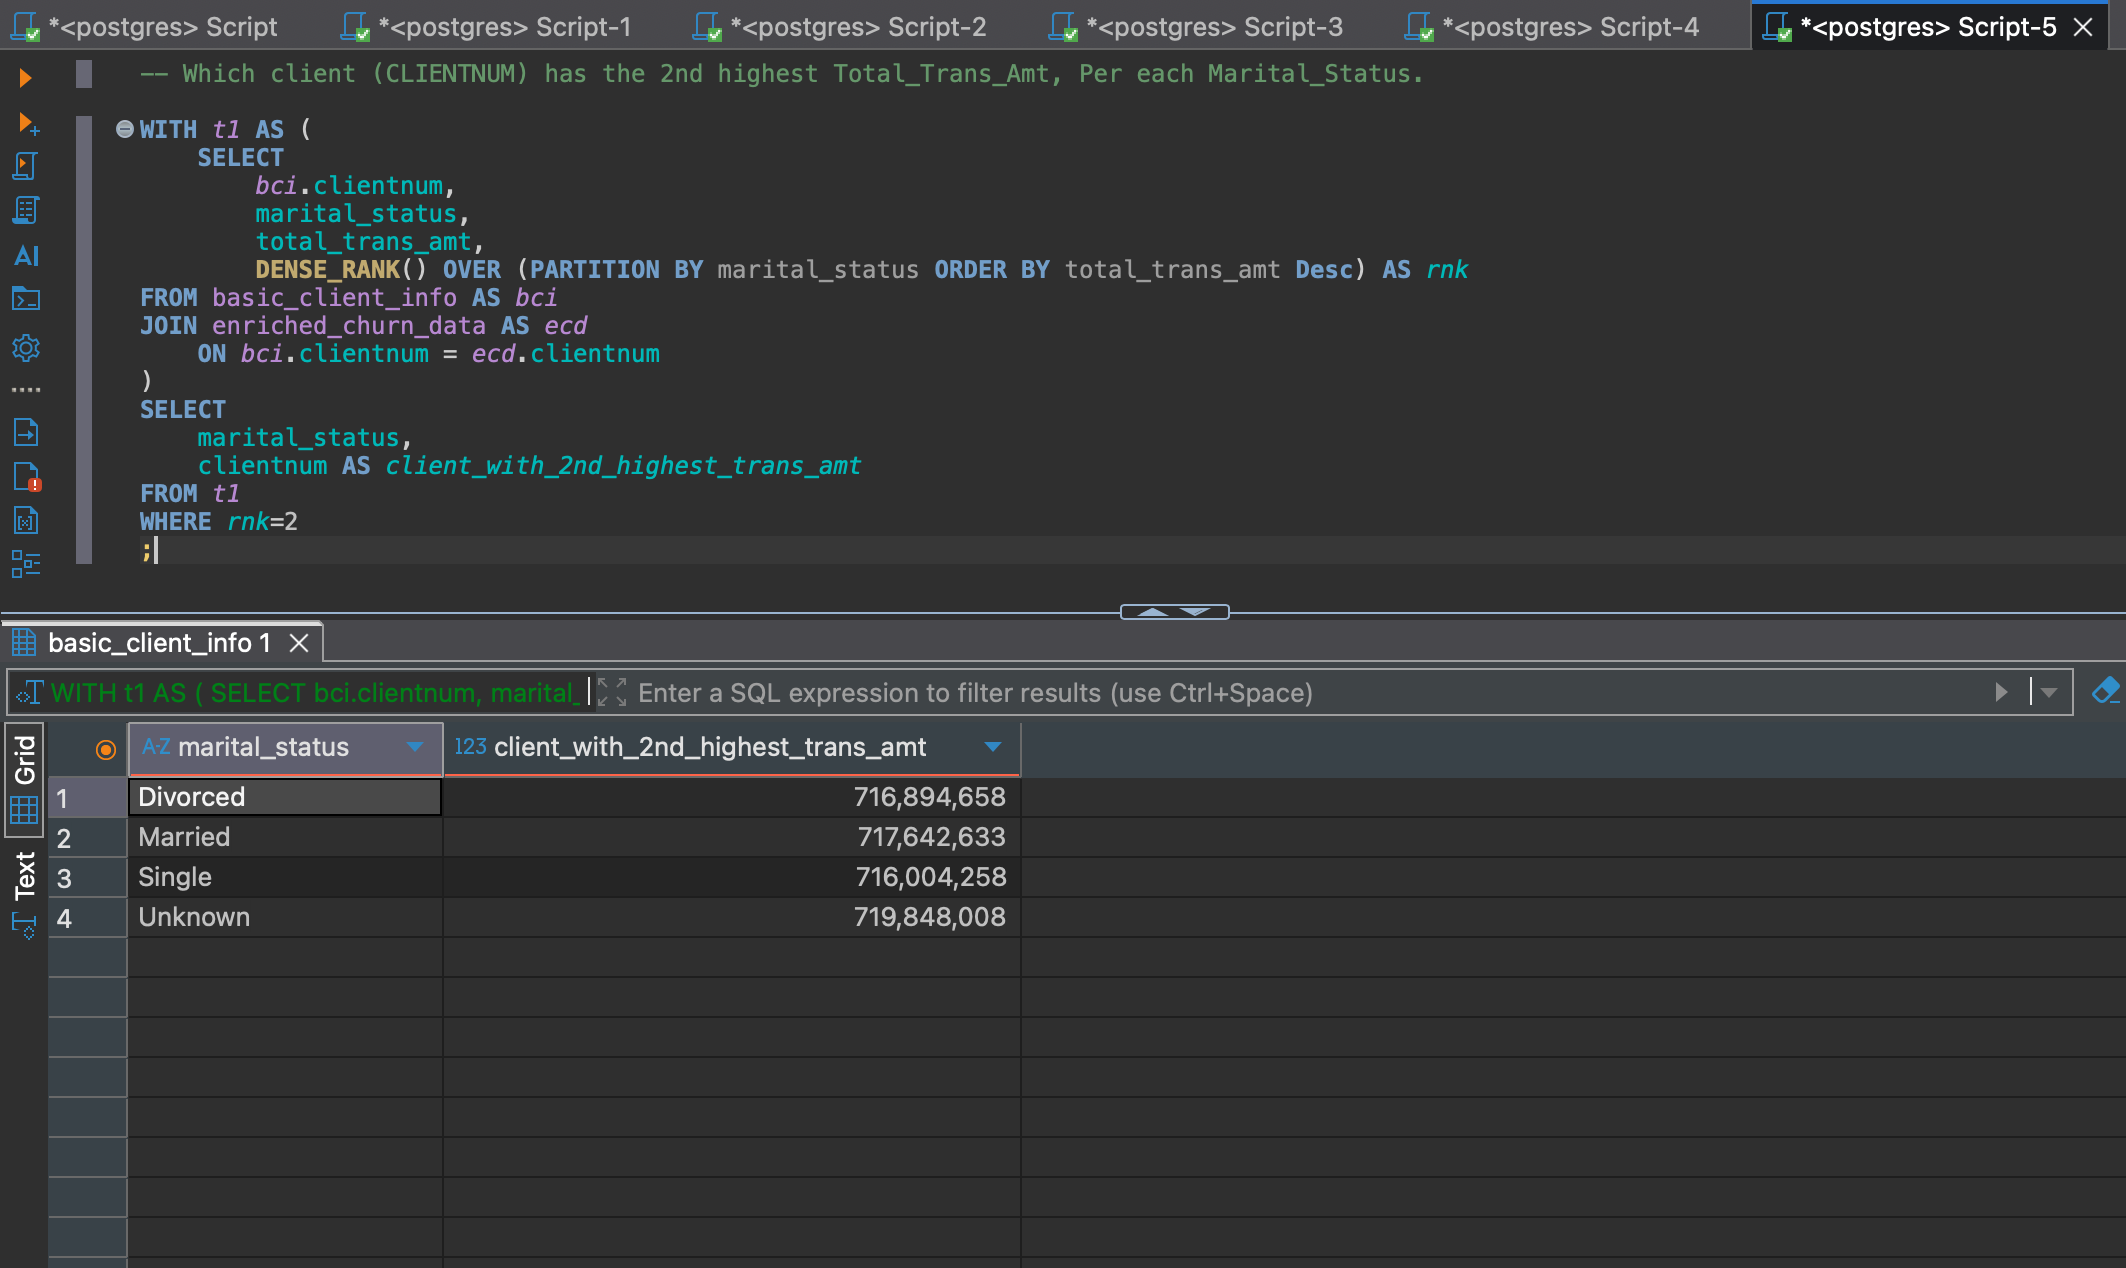


Database Integration

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as creds
import numpy as np
from sqlalchemy import create_engine, text  # ✅ Import text for executing raw SQL

try:
    engine = create_engine(
        f"postgresql+pg8000://{creds.PGUSER}:{creds.PGPASSWORD}@{creds.PGHOST}:{creds.PGPORT}/{creds.PGDATABASE}"
    )

    with engine.connect() as connection:
        connection.execute(text("SELECT 1"))  # ✅ Wrap raw SQL in text()
    print(f"✅ Successfully connected to the {creds.PGDATABASE} database!")

except Exception as e:
    print(f"❌ Error: Failed to connect to the {creds.PGDATABASE} database!")
    print(f"Exception details: {e}")


✅ Successfully connected to the postgres database!


Load data into df

In [15]:
table1 = 'bankchurners'
table2 = 'basic_client_info'
table3 = 'enriched_churn_data'

bank_churners_df = pd.read_sql_table(table1, engine)
basic_client_info_df = pd.read_sql_table(table2, engine)
enriched_churn_df = pd.read_sql_table(table3, engine)


In [17]:
bank_churners_df.head(3)


,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193,676,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215,9205,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882,7277,0.077


In [18]:
basic_client_info_df.head(3)


,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K


In [19]:
enriched_churn_df.head(3)

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36


Statistics Analysis

In [20]:
bank_churners_df.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.938679,7469.124617,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.788539,9090.695763,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.000000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


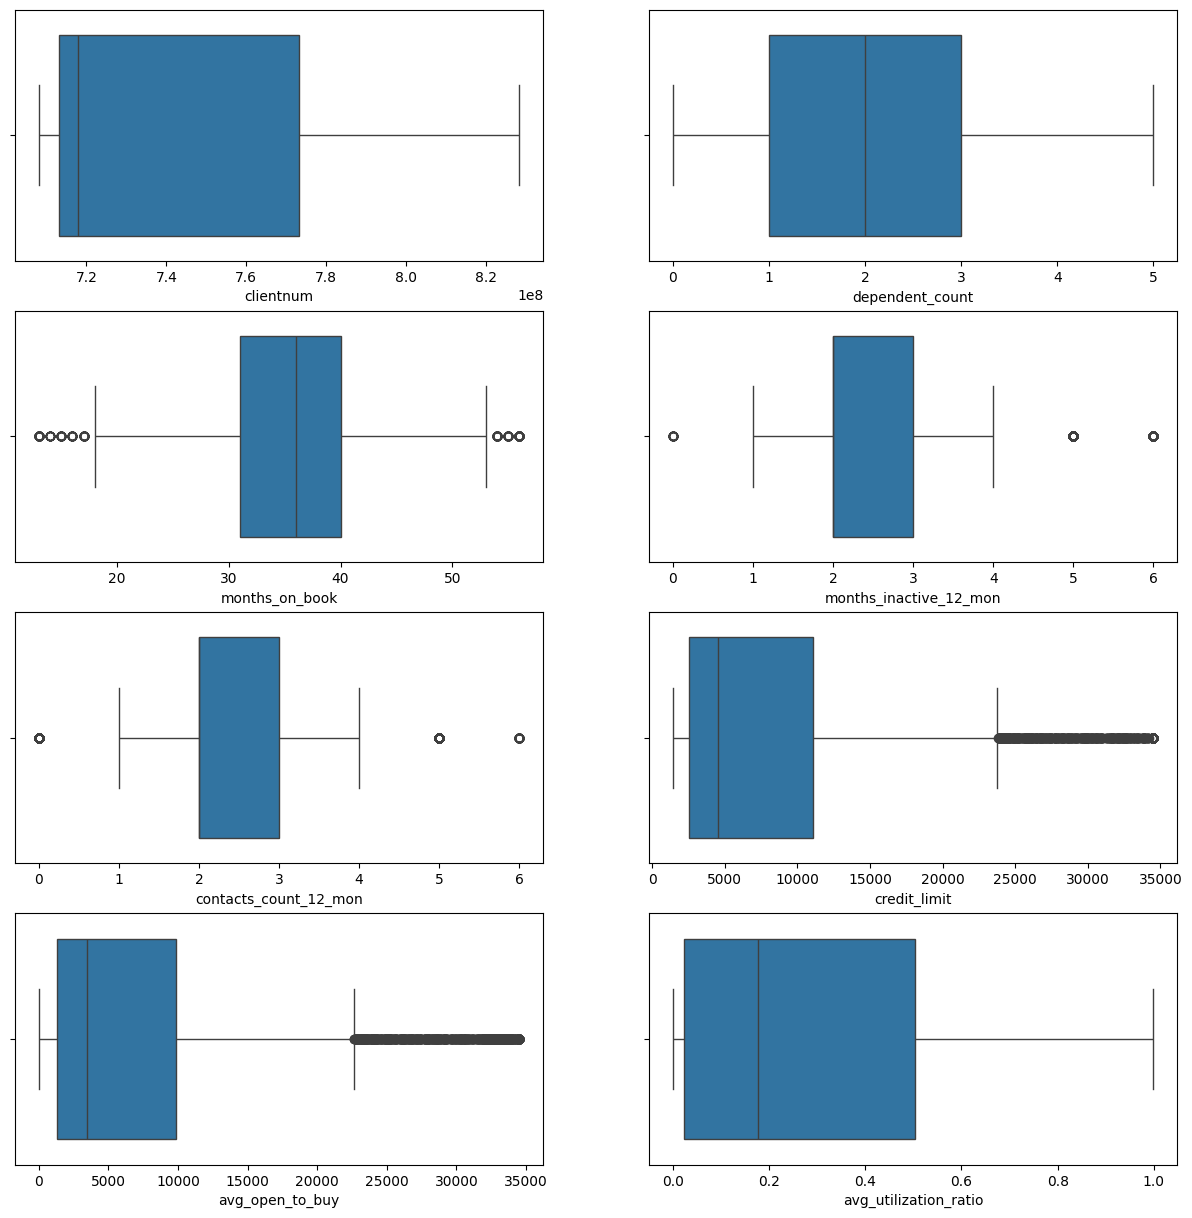





There are no outliers in the 'clientnum' column 


The 'attrition_flag' column is not a numerical column 


There are no outliers in the 'dependent_count' column 


The 'card_category' column is not a numerical column 


There are no outliers in the 'avg_utilization_ratio' column 


 Detected too many potential outliers in the following columns: ['months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'avg_open_to_buy']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.



In [22]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in bank_churners_df.columns:
    if bank_churners_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=bank_churners_df, ax=axs[i])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in bank_churners_df.columns:
    if bank_churners_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = bank_churners_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")


In [23]:
# Printing the Lower and upper interquartile ranges for all the columns in the dataset.
variables = pd.DataFrame(columns=['Variable','Lower Limit','Upper Limit'])

nan_columns = []
for i, var in enumerate(bank_churners_df.columns):
    if var == 'clientnum':
        iqr_lower = np.NaN
        iqr_upper = np.NaN
        nan_columns.append(var)
        
    elif bank_churners_df[var].dtype == 'object':
        iqr_lower = np.NaN
        iqr_upper = np.NaN
        nan_columns.append(var)
        
    else:
        df = bank_churners_df[var]
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
    
    variables.loc[i] = [var, iqr_lower, iqr_upper]
    
print(f"\nFor the following variables with null values: {nan_columns}, clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values \n")

variables


For the following variables with null values: ['clientnum', 'attrition_flag', 'card_category'], clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values 



,Variable,Lower Limit,Upper Limit
0,clientnum,NaN,NaN
1,attrition_flag,NaN,NaN
2,dependent_count,-2.000,6.000
3,card_category,NaN,NaN
4,months_on_book,17.500,53.500
5,months_inactive_12_mon,0.500,4.500
6,contacts_count_12_mon,0.500,4.500
7,credit_limit,-10213.750,23836.250
8,avg_open_to_buy,-11477.250,22660.750
9,avg_utilization_ratio,-0.697,1.223


In [24]:
# Checking to know the datatypes of each column and if there are any missing values
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  int64  
 8   avg_open_to_buy         10127 non-null  int64  
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 791.3+ KB


In [25]:
# Checking to see if there are any duplicates in the dataset. This is the count of unique entries (i.e rows) in the dataset.
bank_churners_df[bank_churners_df.duplicated()].count()

clientnum                 0
attrition_flag            0
dependent_count           0
card_category             0
months_on_book            0
months_inactive_12_mon    0
contacts_count_12_mon     0
credit_limit              0
avg_open_to_buy           0
avg_utilization_ratio     0
dtype: int64

In [26]:
# Checking for unique variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(bank_churners_df.columns):
    variables.loc[i] = [var, bank_churners_df[var].nunique(), bank_churners_df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,clientnum,10127,"[806160108, 804424383, 708300483, 808284783, 7..."
1,attrition_flag,2,"[Existing Customer, Attrited Customer]"
2,dependent_count,6,"[1, 0, 2, 3, 4, 5]"
3,card_category,4,"[Blue, Silver, Gold, Platinum]"
4,months_on_book,44,"[56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 4..."
5,months_inactive_12_mon,7,"[2, 3, 4, 0, 1, 6, 5]"
6,contacts_count_12_mon,7,"[3, 2, 0, 1, 4, 5, 6]"
7,credit_limit,6205,"[3193, 10215, 7882, 1438, 13860, 3006, 2619, 3..."
8,avg_open_to_buy,6670,"[676, 9205, 7277, 1438, 12208, 489, 840, 1757,..."
9,avg_utilization_ratio,964,"[0.788, 0.099, 0.077, 0.0, 0.119, 0.837, 0.679..."


Stats Summary Client Info Dataset